# Homework Lecture4

## Preliminaries

### Imports

In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold,GridSearchCV

%matplotlib inline

### Random Seed

In [2]:
seed=136
np.random.seed(seed)

### Data Directories

In [3]:
raw_data_dir=r"../../raw/C50/C50train"
test_dir    =r"../../raw/C50/C50test"
data_dir=r"../../data/C50"


## Document Data

### Corpus (List of documents)

In [4]:
documents_filename=data_dir+"/C50_documents.csv"
documents=pd.read_csv(documents_filename,index_col="document_id")
documents.head()

,filename,label
document_id,,
0,../../raw/C50/C50train/ScottHillis/253868newsM...,ScottHillis
1,../../raw/C50/C50train/ScottHillis/305692newsM...,ScottHillis
2,../../raw/C50/C50train/ScottHillis/340736newsM...,ScottHillis
3,../../raw/C50/C50train/ScottHillis/140340newsM...,ScottHillis
4,../../raw/C50/C50train/ScottHillis/126593newsM...,ScottHillis


In [5]:
test_documents_filename=data_dir+"/C50_test_documents.csv"
test_documents=pd.read_csv(test_documents_filename,index_col="document_id")
test_documents.head()

,filename,label
document_id,,
0,../../raw/C50/C50test/ScottHillis/373999newsML...,ScottHillis
1,../../raw/C50/C50test/ScottHillis/348602newsML...,ScottHillis
2,../../raw/C50/C50test/ScottHillis/387913newsML...,ScottHillis
3,../../raw/C50/C50test/ScottHillis/392527newsML...,ScottHillis
4,../../raw/C50/C50test/ScottHillis/417664newsML...,ScottHillis


### Load Pre-Trained Features

#### Load Features

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Load the diagram features from files `digram_features.p` and digram_test_features.p` in the data directory

In [6]:
features_filename=data_dir+"/"+"digram_features.p"
features=pickle.load(open(features_filename,"rb"))

In [7]:
test_features_filename=data_dir+"/"+"digram_test_features.p"
test_features=pickle.load(open(test_features_filename,"rb"))

<div class="alert alert-block alert-info"> Problem 1.2 </div>
How many documents are collected in `features`, how can you tell just from the features you loaded

In [8]:
features.shape[0]

2500

<div class="alert alert-block alert-info"> Problem 1.3 </div>
What is the size of the digram vocabulary? How can you tell from the features you loaded?

In [9]:
features.shape[1]

388209

<div class="alert alert-block alert-info"> Problem 1.4 </div>
save the features of the  first document into a vector named `v`.
What its is shape

In [10]:
v=features[0]
v.shape

(1, 388209)

<div class="alert alert-block alert-info"> Problem 1.5 </div>

Do we need to normalize the vector features? how can you tell?

<div class="alert alert-block alert-success"> Two possible solutions (there may be others) </div>

In [11]:
# Solution 1:
#The vectors are not normalized because their dot product is not 1
np.dot(v,v.T)[0,0]

364

In [12]:
# Solution 2:
# v is a vector of integer type.
# For the  features to be normalized their componets would need to be floating point.
v.dtype

dtype('int64')

<div class="alert alert-block alert-info"> Problem 1.6 </div>
If necesary: use `sklearn.preprocessing.normalize` to normalize features and test features.

In [13]:
features=normalize(features)
test_features=normalize(test_features)

## K-Neighbors Text Classification

<div class="alert alert-block alert-info"> Problem 2.0 </div>
using `sklearn.model_selection.train_test_split` to separate data into a 90% training set an a 10% validation set

In [14]:
features_train,features_val,labels_train,labels_val=train_test_split(features,documents["label"],test_size=0.1)

<div class="alert alert-block alert-info"> Problem 2.1 </div>
Show the sizes of train and validation sets

In [15]:
features_train.shape,features_val.shape

((2250, 388209), (250, 388209))

<div class="alert alert-block alert-info"> Problem 2.2 </div>
using `sklearn.neighbors.KNeighborsClassifier` fit a nearest neighbor classifier to the training data

In [16]:
X=features_train
Y=labels_train

In [17]:
model=KNeighborsClassifier(1)
model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

<div class="alert alert-block alert-info"> Problem 2.3 </div>
What is the predicted label for the first test document?
Does it agree with the true label?

In [18]:
X_test=test_features
Y_test=test_documents["label"]

In [19]:
print("predicted:",model.predict(X_test[0])[0])
print("actual:",Y_test[0])

predicted: BenjaminKangLim
actual: ScottHillis


In [20]:
# Labels do not agree

<div class="alert alert-block alert-info"> Problem 2.4 </div>
Use the train/valuation split to select the optimal number of neighbors K in K-neighbors classifier, using accuracy as 
your selection metric.

In [21]:
X=features_train
Y=labels_train
X_val=features_val
Y_val=labels_val

In [22]:
X_val.shape,X.shape,Y.shape,Y_val.shape

((250, 388209), (2250, 388209), (2250,), (250,))

In [23]:
Ks=np.arange(1,11)
accuracies=np.zeros(len(Ks))
for idx,K in enumerate(Ks):
    model=KNeighborsClassifier(K)
    model.fit(X,Y)
    Y_pred=model.predict(X_val)
    acc=np.mean(Y_pred==Y_val)
    accuracies[idx]=acc
    print(K,acc)
best_idx=accuracies.argmax()
best_K=Ks[best_idx]
best_accuracy=accuracies[best_idx]
print("Best K", best_K)
print("Best Accuracy",best_accuracy)

1 0.74
2 0.676
3 0.628
4 0.624
5 0.612
6 0.616
7 0.588
8 0.592
9 0.588
10 0.592
Best K 1
Best Accuracy 0.74


<div class="alert alert-block alert-info"> Problem 2.5 </div>
Retrain the best model will all non-test documents and evaluate performance on the test data set.

In [24]:
X=features
Y=documents["label"]
model=KNeighborsClassifier(best_K)
model.fit(X,Y)
Y_pred=model.predict(X_test)
np.mean(Y_pred==Y_test)

0.5348

<div class="alert alert-block alert-info"> Problem 2.6 </div>
Is there a significant difference between the performance in the training and test set? can you speculate on why?

In [25]:
# Performance is significantly lower on the test set, probably because the test documents are drawn from a different distribution.

### Naive Bayes Clasifier for Text

In [26]:
data_dir=r"../../raw/amazon-reviews"

In [29]:
reviews_filename=  data_dir+"/Reviews.csv"

<div class="alert alert-block alert-info"> Problem 3.0 </div>
Save file `reviews.csv` from canvas into the `data_dir` above

<div class="alert alert-block alert-info"> Problem 3.1 </div>
Read reviews into a data frame

In [30]:
data=pd.read_csv(reviews_filename)

<div class="alert alert-block alert-info"> Problem 3.2 </div>
Use panda's function isna() to count how many rows have a missing "Summary" column

In [31]:
data["Summary"].isna().sum()

27

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Use panda's function fillna() to turn missing summaries into empty ("") summaries

In [32]:
data["Summary"].fillna("",inplace=True)
data["Summary"].isna().sum()

0

<div class="alert alert-block alert-info"> Problem 3.4 </div>
Create two `numpy` arrays
1. `documents_all` containing the contents of the "Summary" column
2. `labels_all` containing the "Score" column

In [33]:
documents_all=data["Summary"].values
labels_all=data["Score"].values
print(documents_all.shape)

(568454,)


<div class="alert alert-block alert-info"> Problem 3.5 </div>
Split `all_documents` into a training  and test document set using a 10% test split

In [34]:
docs,docs_test,labels,labels_test=train_test_split(documents_all,labels_all,test_size=0.1)
print(docs.shape,docs_test.shape)

(511608,) (56846,)


In [35]:
#doc_data=pd.DataFrame(np.c_[docs,labels],columns=["Summary","Score"])
#doc_data.to_csv(data_dir+"/documents.csv",index=False)

In [36]:
#doc_test_data=pd.DataFrame(np.c_[docs_test,labels_test],columns=["Summary","Score"])
#doc_test_data.to_csv(data_dir+"/documents_test.csv",index=False)

<div class="alert alert-block alert-info"> Problem 3.6</div>
Create `count`, `set` and `Tfidf` features both for your training and test sets.
1. Set the `input` variable to "content", as the document array contains the text of the document not  filenames as in the `C50` example.
2. ** Do not ** set the `tokenizer` and `stopword` variables, they slow down the processing significantly, and, for this example do not really improve performance.

In [37]:
countVectorizer=CountVectorizer(input="content")

In [38]:
setVectorizer=CountVectorizer(input="content",
                              binary=True
                             )

In [39]:
tfIdfVectorizer=TfidfVectorizer(input="content")

In [40]:
count_features=countVectorizer.fit_transform(docs)

In [41]:
set_features=setVectorizer.fit_transform(docs)

In [42]:
tfidf_features=tfIdfVectorizer.fit_transform(docs)

In [43]:
count_test_features=countVectorizer.transform(docs_test)
set_test_features=setVectorizer.transform(docs_test)
tfidf_test_features=tfIdfVectorizer.transform(docs_test)

<div class="alert alert-block alert-info"> Problem 3.7 </div>
Show the number of documents on the training set, and the size of the vocabulary.

In [44]:
N=count_features.shape[0]
V=count_features.shape[1] # Vocabulary size
print("N     = ",N)
print("V     = ",V)

N     =  511608
V     =  32010


<div class="alert alert-block alert-info"> Problem 3.8 </div>
We will perform binary classification, create `Y` and `Y_test` variables that are true if the review score is larger than 3
and false otherwise

In [45]:
Y=labels>3
Y_test=labels_test>3

<div class="alert alert-block alert-info"> Problem 3.9 </div>
What proportion of reviews are positive on the training set?

In [46]:
np.mean(Y)

0.7806367375021501

<div class="alert alert-block alert-info"> Problem 3.10 </div>
To check that you have all your inputs set up correctly check that you
can fit a `MultinomialNB` with smoothing $\alpha=1$ to the count features.
What prediction accuracy do you obtain *in sample* in the training set?

In [47]:
alpha=1

In [48]:
model=MultinomialNB(alpha)
model.fit(count_features,Y)
np.mean(model.predict(count_features)==Y)

0.8856605056996764

<div class="alert alert-block alert-info"> Problem 3.11 </div>
Use K-Fold validation with K=10 to selected the best model between `set`, `count` and `tfidf` features using accuracy as the selection metric.

State clearly what model has the best accuracy.

[HINT] 
1. Look and how this is done on the `Validate_Text` notebook.
2. You can resue any code you find useful on the `Validate_Text` notebook.

In [49]:
K=10

In [50]:
  def model_cross_validation(model,X,y,folds):
    kfolds=len(folds)
    train_performance=np.empty(kfolds)
    validation_performance=np.empty(kfolds)
    for idx in range(kfolds):
        train,validation=folds[idx]
        X_train=X[train]
        y_train=y[train]
        model.fit(X_train,y_train)
        train_accuracy=np.average(model.predict(X_train)==y_train)
        X_validation=X[validation]
        y_validation=y[validation]
        validation_accuracy=np.average(model.predict(X_validation)==y_validation)
        train_performance[idx]=train_accuracy
        validation_performance[idx]=validation_accuracy
    return np.array(train_performance),np.array(validation_performance)

In [51]:
kf=KFold(10,shuffle=True)
folds=list(kf.split(set_features))

In [52]:
t,v_count=model_cross_validation(model,count_features,Y,folds)
print(t.mean(),v_count.mean())

0.8859732451489319 0.8772810421374558


In [53]:
t,v_tfidf=model_cross_validation(model,tfidf_features,Y,folds)
print(t.mean(),v_tfidf.mean())

0.8779084767890643 0.8698261219288742


In [54]:
t,v_set=model_cross_validation(model,set_features,Y,folds)
print(t.mean(),v_set.mean())

0.8860505613197704 0.8773005876266156


In [55]:
# Set and Count features are essentially tied  (87.71% vs 87.70%), tifdif does a bit worse (87.0%)

<div class="alert alert-block alert-info"> Problem 3.12 </div>
Fit the best model to all the training data and compute its accuray on the test set

In [56]:
model.fit(set_features,Y)
Y_pred=model.predict(set_test_features)
set_accuracy=np.mean(Y_pred==Y_test)
set_accuracy

0.8791647609330472

<div class="alert alert-block alert-info"> Problem 3.13</div>
Make a box plot showing the distribution of `set`, `count` and `tfidf` accuracies on the K fold cross-validations.

Display clearly in the graph the performance of the best model on the test set.


In [57]:
# we save in a panda's data frame to make a pretty graph later
datav=np.vstack((v_count,v_tfidf,v_set)).T
data=pd.DataFrame(datav,columns=["Count","TfIdf","Set"])

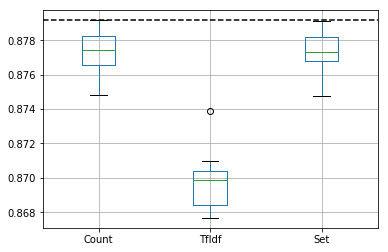

In [58]:
ax=data.boxplot()
ax.axhline(y=set_accuracy,linestyle="dashed",color="k")

<div class="alert alert-block alert-info"> Problem 3.14</div>
Comment
1. Why do the `test` and `count` results look so similar in this case>
2. Comment on the difference between cross-validation average performace and test performance

In [59]:
#1.  We are training a model on very short summary texts, so that chances that a word repeats itself are very low.
#    Therefore, `set` and `count` feature vectors are nearly identical.

#2. Test performance is a bit better than cross-validation performance because we train the model on 10% more data.
#   This indicates the model has enough parameters and could still benefit from still more training data.

<div class="alert alert-block alert-info"> Problem 4.0 </div>
use the `set` features fit to the full training set.

use `sklearn` `model.predict_prob` function to compute the probabilities of the possitive class.

[HINT] `model.predict_prob` return probabilities for both the negative and positive class, we only want to get the posive class

In [60]:
model.fit(set_features,Y)
set_prob=model.predict_proba(set_test_features)[:,1]

<div class="alert alert-block alert-info"> Problem 4.1 </div>
use `sklearn` `metrics.roc_curve` to create a roc_curve for the `set` features classifier

Create a graph with the ROC curve.

In [61]:
set_fpr,set_tpr,set_threshold=metrics.roc_curve(Y_test,set_prob)

Text(0,0.5,'True Positive Rate')

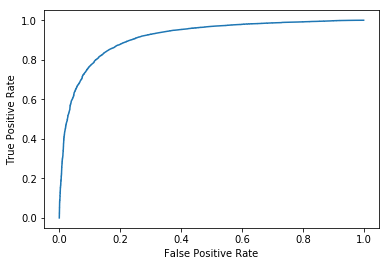

In [62]:
plt.plot(set_fpr,set_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

<div class="alert alert-block alert-info"> Problem 4.2 </div>
1. Find the point on the ROC curve with a threshold probability closest to 0.5.
2. Show its rate of false positives and false negatives.
3. Show its accuracy and compare to the `set` classifier accuracy that you computed before

In [63]:
set_ht=np.argmin((set_threshold-0.5)**2)
print(set_ht,set_threshold[set_ht])
print(set_fpr[set_ht],set_tpr[set_ht])
print("Accuracy",(1-set_fpr[set_ht])*np.mean(Y_test==0)+set_tpr[set_ht]*np.mean(Y_test==1))
print("set classifier accuracy",set_accuracy)

11414 0.4999348767199922
0.33095027713069325 0.9380588778521072
Accuracy 0.8791471695457904
set classifier accuracy 0.8791647609330472


In [64]:
# Accuracies are very close (the threshold on the ROC curve is not exactly 0.5)

<div class="alert alert-block alert-info"> Problem 4.3 </div>
Redraw the ROC curve, highlighting the point of the curve that correspont to optimal accuracy.

Text(0,0.5,'True Positive Rate')

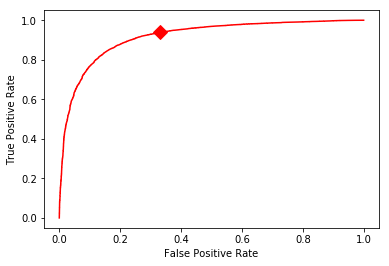

In [65]:
color="RED"
plt.plot(set_fpr,set_tpr,label="set",color=color)
plt.plot([set_fpr[set_ht]], [set_tpr[set_ht]], marker='D', markersize=10, color=color)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")